# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations / change to size 1500
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#begin processing collecting relevant data
print("Beginning Data Retrieval \n-----------------------------")
sets = 1
records = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = 'imperial'

#creating lists for dataframe
weather_data = []
Citi = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

#loop through api/data
for city in cities:
    try:
        queryurl = url + 'appid=' + api_key + '&q=' + city + '&units=' + unit
        weather_resp = requests.get(queryurl).json()
        weather_data.append(weather_resp)
        Citi.append(weather_resp['name'])
        Lat.append(weather_resp['coord']['lat'])
        Lng.append(weather_resp['coord']['lon'])
        Cloudiness.append(weather_resp['clouds']['all'])
        Country.append(weather_resp['sys']['country'])
        Date.append(datetime.fromtimestamp(int(weather_resp['dt'])).isoformat())
        Humidity.append(weather_resp['main']['humidity'])
        Max_Temp.append(weather_resp['main']['temp_max'])
        Wind_Speed.append(weather_resp['wind']['speed'])
        records += 1
        print(f'Processing Record {records} of Set {sets} | {city}')
        if records == 50:
            sets += 1
            records = 0
    except (NameError, KeyError) as e:
        print('City not found. Skipping...')
print('----------------------------- \nData Retrieval Complete \n-----------------------------')

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | avera
Processing Record 4 of Set 1 | ust-kuyga
Processing Record 5 of Set 1 | vila
Processing Record 6 of Set 1 | muros
Processing Record 7 of Set 1 | klaksvik
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | vila velha
Processing Record 11 of Set 1 | simbahan
Processing Record 12 of Set 1 | dalby
City not found. Skipping...
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | saint-augustin
Processing Record 15 of Set 1 | singkang
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | la ligua
Processing Record 20 of Set 1 | amalner
City not found. Skipping...
Processing Record 21 of Set 1 | chanute
Processing Record 22 of Set 1 |

Processing Record 37 of Set 4 | coahuayana
Processing Record 38 of Set 4 | lethem
Processing Record 39 of Set 4 | hofn
Processing Record 40 of Set 4 | linfen
Processing Record 41 of Set 4 | georgetown
City not found. Skipping...
Processing Record 42 of Set 4 | harer
Processing Record 43 of Set 4 | banmankhi
Processing Record 44 of Set 4 | nishihara
Processing Record 45 of Set 4 | kulynychi
Processing Record 46 of Set 4 | arraial do cabo
Processing Record 47 of Set 4 | ust-uda
City not found. Skipping...
Processing Record 48 of Set 4 | qaanaaq
Processing Record 49 of Set 4 | labuhan
Processing Record 50 of Set 4 | eyl
City not found. Skipping...
Processing Record 1 of Set 5 | kaitangata
City not found. Skipping...
Processing Record 2 of Set 5 | rayevskiy
Processing Record 3 of Set 5 | puerto narino
Processing Record 4 of Set 5 | nuuk
Processing Record 5 of Set 5 | nouadhibou
Processing Record 6 of Set 5 | cabra
Processing Record 7 of Set 5 | ouargaye
Processing Record 8 of Set 5 | saint

Processing Record 23 of Set 8 | manica
Processing Record 24 of Set 8 | havre-saint-pierre
Processing Record 25 of Set 8 | gbadolite
Processing Record 26 of Set 8 | parral
Processing Record 27 of Set 8 | prince rupert
Processing Record 28 of Set 8 | vradiyivka
Processing Record 29 of Set 8 | beringovskiy
Processing Record 30 of Set 8 | salitral
Processing Record 31 of Set 8 | gigmoto
Processing Record 32 of Set 8 | sioux lookout
Processing Record 33 of Set 8 | candelaria
Processing Record 34 of Set 8 | champerico
Processing Record 35 of Set 8 | riyadh
Processing Record 36 of Set 8 | callaway
Processing Record 37 of Set 8 | pesaro
Processing Record 38 of Set 8 | naryan-mar
Processing Record 39 of Set 8 | tagusao
Processing Record 40 of Set 8 | pevek
Processing Record 41 of Set 8 | logansport
Processing Record 42 of Set 8 | sabaudia
Processing Record 43 of Set 8 | cayenne
Processing Record 44 of Set 8 | gladstone
Processing Record 45 of Set 8 | solsona
Processing Record 46 of Set 8 | todo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {'City':Citi, 'Cloudiness':Cloudiness, 'Country':Country, 'Date': Date, 'Humidity':Humidity, 'Lat':Lat, 'Lng':Lng,\
                'Max Temp':Max_Temp, 'Wind Speed':Wind_Speed}
weather_df = pd.DataFrame(weather_dict).count()
weather_df

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Lat           549
Lng           549
Max Temp      549
Wind Speed    549
dtype: int64

In [7]:
#convert into df and save output
weather_df = pd.DataFrame(weather_dict)
weather_df.dropna()
weather_df
weather_df.to_csv('output.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

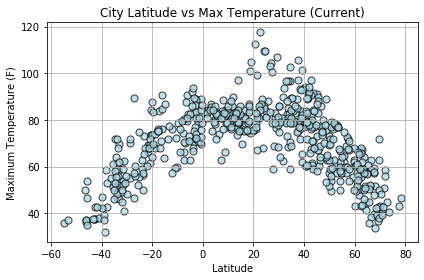

In [8]:
#plot lat and max temp
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker='o', facecolor='lightblue', edgecolor='black', 
            s=50, alpha=0.75, linewidth=1)
plt.title('City Latitude vs Max Temperature (Current)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.grid()
plt.tight_layout()
plt.savefig('Images/latvtemp.png')

#### Latitude vs. Humidity Plot

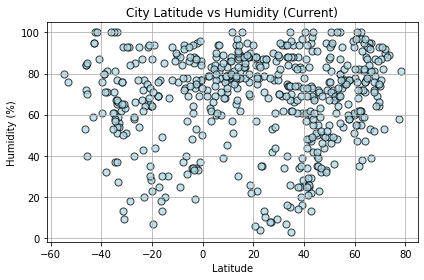

In [9]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker='o', facecolor='lightblue', edgecolor='black', 
            s=50, alpha=0.75, linewidth=1)
plt.title('City Latitude vs Humidity (Current)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.tight_layout()
plt.savefig('Images/latvhum.png')

#### Latitude vs. Cloudiness Plot

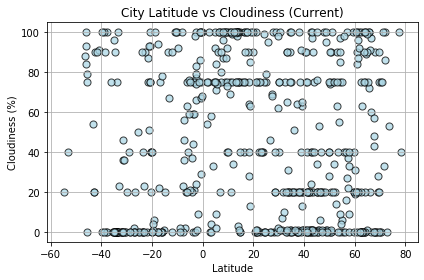

In [10]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker='o', facecolor='lightblue', edgecolor='black', 
            s=50, alpha=0.75, linewidth=1)
plt.title('City Latitude vs Cloudiness (Current)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.tight_layout()
plt.savefig('Images/latvcloud.png')

#### Latitude vs. Wind Speed Plot

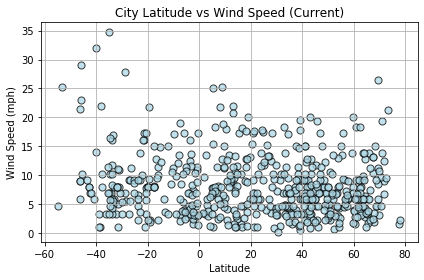

In [11]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker='o', facecolor='lightblue', edgecolor='black', 
            s=50, alpha=0.75, linewidth=1)
plt.title('City Latitude vs Wind Speed (Current)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.tight_layout()
plt.savefig('Images/latvwind.png')